In [4]:
import pandas as pd

In [7]:
df=pd.read_csv('/content/GOOGLE.csv')

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [9]:
len(df)

4431

In [10]:
!pip install bayesian-optimization

In [11]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [12]:
df.duplicated().sum()

0

In [13]:
train_size=int(0.8*len(df))
train_df=df.iloc[:train_size]
test_df=df.iloc[train_size:]

In [14]:
from bayes_opt import BayesianOptimization
from prophet import Prophet

In [15]:

train_df = train_df.rename(columns={'Date': 'ds', 'Close': 'y'})
test_df = test_df.rename(columns={'Date': 'ds', 'Close': 'y'})


In [16]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from bayes_opt import BayesianOptimization
import pandas as pd


train_df = train_df.rename(columns={'Date': 'ds', 'Close': 'y'})
test_df = test_df.rename(columns={'Date': 'ds', 'Close': 'y'})


train_df['ds'] = pd.to_datetime(train_df['ds'])
test_df['ds'] = pd.to_datetime(test_df['ds'])


def prophet_model(changepoint_prior_scale, seasonality_prior_scale, holiday_prior_scale):
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holiday_prior_scale
    )

    model.fit(train_df)

    future = model.make_future_dataframe(periods=len(test_df), freq='D')
    forecast = model.predict(future)

    y_pred = forecast['yhat'].iloc[-len(test_df):].values
    y_true = test_df['y'].values

    mae = mean_absolute_error(y_true, y_pred)

    return -mae

pbound = {
    'changepoint_prior_scale': (0.001, 0.5),
    'seasonality_prior_scale': (0.01, 10),
    'holiday_prior_scale': (0.01, 10)
}


optimizer = BayesianOptimization(
    f=prophet_model,
    pbounds=pbound,
    random_state=42
)

optimizer.maximize(init_points=5, n_iter=25)


best_params = optimizer.max['params']
print("Best Hyperparameters:", best_params)


|   iter    |  target   | change... | holida... | season... |
-------------------------------------------------------------


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/u383gtpg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/_kwiagj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80345', 'data', 'file=/tmp/tmpf5vxwxgu/u383gtpg.json', 'init=/tmp/tmpf5vxwxgu/_kwiagj_.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelg9c6ew4n/prophet_model-20250208102432.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5

| 1         | -417.4    | 0.1879    | 9.508     | 7.323     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/5eif41br.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20194', 'data', 'file=/tmp/tmpf5vxwxgu/r2667851.json', 'init=/tmp/tmpf5vxwxgu/5eif41br.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model0rsaj5wb/prophet_model-20250208102438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/yf8bc1s9.json


| 2         | -417.7    | 0.2997    | 1.569     | 1.568     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/wmxpvzqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43765', 'data', 'file=/tmp/tmpf5vxwxgu/yf8bc1s9.json', 'init=/tmp/tmpf5vxwxgu/wmxpvzqg.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model0watsyzt/prophet_model-20250208102447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/fud17bfp.json


| 3         | -416.7    | 0.02998   | 8.663     | 6.015     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/lhw9cuuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71408', 'data', 'file=/tmp/tmpf5vxwxgu/fud17bfp.json', 'init=/tmp/tmpf5vxwxgu/lhw9cuuv.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model2tucdfy4/prophet_model-20250208102449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/plcufs70.json


| 4         | -417.8    | 0.3543    | 0.2156    | 9.699     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/l1hb_ff1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79052', 'data', 'file=/tmp/tmpf5vxwxgu/plcufs70.json', 'init=/tmp/tmpf5vxwxgu/l1hb_ff1.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modellao3iirj/prophet_model-20250208102452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 5         | -417.7    | 0.4164    | 2.131     | 1.826     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/43k0u9u4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/8lcja9a4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44700', 'data', 'file=/tmp/tmpf5vxwxgu/43k0u9u4.json', 'init=/tmp/tmpf5vxwxgu/8lcja9a4.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modeljmu896mf/prophet_model-20250208102455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 6         | -482.8    | 0.001     | 7.999     | 5.01      |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/zj366r7k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/okpgr_80.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66770', 'data', 'file=/tmp/tmpf5vxwxgu/zj366r7k.json', 'init=/tmp/tmpf5vxwxgu/okpgr_80.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelbd3ftmzt/prophet_model-20250208102458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 7         | -416.8    | 0.0578    | 8.767     | 6.833     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/iq9sm_6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/sz3chy44.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11166', 'data', 'file=/tmp/tmpf5vxwxgu/iq9sm_6o.json', 'init=/tmp/tmpf5vxwxgu/sz3chy44.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelcw26fg25/prophet_model-20250208102500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 8         | -417.6    | 0.2541    | 9.85      | 6.125     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/0ppvk5ra.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/ecj5i89y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7479', 'data', 'file=/tmp/tmpf5vxwxgu/0ppvk5ra.json', 'init=/tmp/tmpf5vxwxgu/ecj5i89y.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelkcxjjq2j/prophet_model-20250208102504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 9         | -416.8    | 0.04998   | 2.463     | 0.4291    |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/7j2l806d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/ilhljbsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36787', 'data', 'file=/tmp/tmpf5vxwxgu/7j2l806d.json', 'init=/tmp/tmpf5vxwxgu/ilhljbsa.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelo74j9kpa/prophet_model-20250208102506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 10        | -417.7    | 0.4755    | 3.614     | 1.23      |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/nh7zswlg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/tmdzzqlk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91340', 'data', 'file=/tmp/tmpf5vxwxgu/nh7zswlg.json', 'init=/tmp/tmpf5vxwxgu/tmdzzqlk.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model74e3in_5/prophet_model-20250208102511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 11        | -417.4    | 0.4719    | 1.088     | 0.1035    |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/h08il_q7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/vjjs0ol5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55531', 'data', 'file=/tmp/tmpf5vxwxgu/h08il_q7.json', 'init=/tmp/tmpf5vxwxgu/vjjs0ol5.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelrvhrwkkt/prophet_model-20250208102514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5

| 12        | -416.7    | 0.04726   | 0.01315   | 1.076     |


DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/7gi_mzks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77480', 'data', 'file=/tmp/tmpf5vxwxgu/fctf4ljn.json', 'init=/tmp/tmpf5vxwxgu/7gi_mzks.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelg7q7cafr/prophet_model-20250208102517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 13        | -417.5    | 0.1812    | 2.531     | 0.3374    |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/ft_ow3iv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/1m1d0xmm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69422', 'data', 'file=/tmp/tmpf5vxwxgu/ft_ow3iv.json', 'init=/tmp/tmpf5vxwxgu/1m1d0xmm.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model32or6dz3/prophet_model-20250208102520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 14        | -417.5    | 0.2064    | 0.04283   | 2.857     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/dqkh__3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/h8112rds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34943', 'data', 'file=/tmp/tmpf5vxwxgu/dqkh__3t.json', 'init=/tmp/tmpf5vxwxgu/h8112rds.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model0c5kavte/prophet_model-20250208102524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 15        | -416.8    | 0.04451   | 1.557     | 3.606     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/3ftiuh3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/av1lscpv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20683', 'data', 'file=/tmp/tmpf5vxwxgu/3ftiuh3y.json', 'init=/tmp/tmpf5vxwxgu/av1lscpv.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model758dyb9s/prophet_model-20250208102527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 16        | -417.0    | 0.06286   | 3.261     | 3.165     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/_2wcgfed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/poadhpt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8771', 'data', 'file=/tmp/tmpf5vxwxgu/_2wcgfed.json', 'init=/tmp/tmpf5vxwxgu/poadhpt9.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelcko_xx_6/prophet_model-20250208102530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 17        | -417.7    | 0.478     | 2.736     | 4.661     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/lxqzpg7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/y49s_thj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95251', 'data', 'file=/tmp/tmpf5vxwxgu/lxqzpg7p.json', 'init=/tmp/tmpf5vxwxgu/y49s_thj.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modeln99qryhv/prophet_model-20250208102533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 18        | -417.8    | 0.4773    | 0.5092    | 4.611     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/0eu31s8p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/dc5ny3n0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63641', 'data', 'file=/tmp/tmpf5vxwxgu/0eu31s8p.json', 'init=/tmp/tmpf5vxwxgu/dc5ny3n0.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelq3u0nzkb/prophet_model-20250208102538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 19        | -417.2    | 0.09549   | 4.713     | 2.483     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/u48frkqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/93qcazx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39437', 'data', 'file=/tmp/tmpf5vxwxgu/u48frkqo.json', 'init=/tmp/tmpf5vxwxgu/93qcazx3.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelu8ssljg5/prophet_model-20250208102541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 20        | -417.8    | 0.3765    | 4.479     | 4.107     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/58axb73k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/jn8rkydt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63481', 'data', 'file=/tmp/tmpf5vxwxgu/58axb73k.json', 'init=/tmp/tmpf5vxwxgu/jn8rkydt.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelxw2kc63h/prophet_model-20250208102544.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 21        | -416.7    | 0.05915   | 1.672     | 5.729     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/n7yl6xz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/9eg1uot7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9006', 'data', 'file=/tmp/tmpf5vxwxgu/n7yl6xz8.json', 'init=/tmp/tmpf5vxwxgu/9eg1uot7.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model_5_dm1g0/prophet_model-20250208102547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 22        | -466.7    | 0.001244  | 3.13      | 6.304     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/otzvdzj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/z094x38u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9262', 'data', 'file=/tmp/tmpf5vxwxgu/otzvdzj7.json', 'init=/tmp/tmpf5vxwxgu/z094x38u.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelko6o1g2r/prophet_model-20250208102550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 23        | -417.7    | 0.2307    | 0.3871    | 6.177     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/lt8wapjd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/sn57z4s2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44929', 'data', 'file=/tmp/tmpf5vxwxgu/lt8wapjd.json', 'init=/tmp/tmpf5vxwxgu/sn57z4s2.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelolngvpsm/prophet_model-20250208102555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:25:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 24        | -417.2    | 0.1342    | 5.195     | 0.867     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/clq9v48u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/wgu94auw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66636', 'data', 'file=/tmp/tmpf5vxwxgu/clq9v48u.json', 'init=/tmp/tmpf5vxwxgu/wgu94auw.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelhfivaakr/prophet_model-20250208102558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:25:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 25        | -417.8    | 0.4886    | 6.278     | 1.969     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/vlv_si0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/7_yjlg4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91175', 'data', 'file=/tmp/tmpf5vxwxgu/vlv_si0o.json', 'init=/tmp/tmpf5vxwxgu/7_yjlg4m.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modeljtc9042m/prophet_model-20250208102601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 26        | -417.6    | 0.4197    | 6.67      | 0.2991    |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/gufxtnjr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/idx5xax0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54524', 'data', 'file=/tmp/tmpf5vxwxgu/gufxtnjr.json', 'init=/tmp/tmpf5vxwxgu/idx5xax0.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modeld61xx65z/prophet_model-20250208102606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 27        | -417.7    | 0.2506    | 0.03975   | 8.065     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/vmb2f5k3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/q7gip28f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72073', 'data', 'file=/tmp/tmpf5vxwxgu/vmb2f5k3.json', 'init=/tmp/tmpf5vxwxgu/q7gip28f.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modele4cvhjr5/prophet_model-20250208102609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 28        | -416.9    | 0.05751   | 7.801     | 1.342     |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/wwo65csl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/ovdqoqtc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27769', 'data', 'file=/tmp/tmpf5vxwxgu/wwo65csl.json', 'init=/tmp/tmpf5vxwxgu/ovdqoqtc.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modelhctus0_m/prophet_model-20250208102612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 29        | -417.2    | 0.4857    | 8.212     | 0.01772   |


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/oai94pe9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/40wlyitb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76261', 'data', 'file=/tmp/tmpf5vxwxgu/oai94pe9.json', 'init=/tmp/tmpf5vxwxgu/40wlyitb.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_model65vguk52/prophet_model-20250208102616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


| 30        | -417.6    | 0.3809    | 9.374     | 1.067     |
Best Hyperparameters: {'changepoint_prior_scale': 0.029983722471931533, 'holiday_prior_scale': 8.663099696291603, 'seasonality_prior_scale': 6.015138967314656}


In [17]:
final_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holiday_prior_scale']
)

final_model.fit(train_df)

future = final_model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = final_model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/usdttq9v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf5vxwxgu/g5ba_9st.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10372', 'data', 'file=/tmp/tmpf5vxwxgu/usdttq9v.json', 'init=/tmp/tmpf5vxwxgu/g5ba_9st.json', 'output', 'file=/tmp/tmpf5vxwxgu/prophet_modela048nkw4/prophet_model-20250208102621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         yhat   yhat_lower   yhat_upper
4426 2021-02-13  1605.322841  1401.741009  1826.535107
4427 2021-02-14  1605.888683  1410.561836  1830.971235
4428 2021-02-15  1610.009263  1411.350682  1835.679070
4429 2021-02-16  1610.579527  1408.867511  1826.485664
4430 2021-02-17  1611.596775  1406.061178  1833.536811


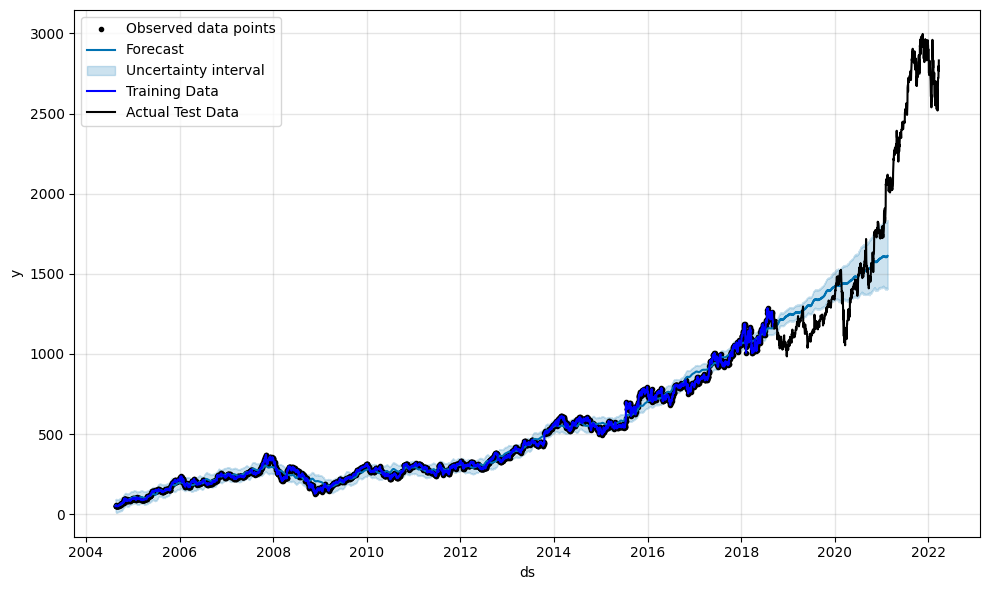

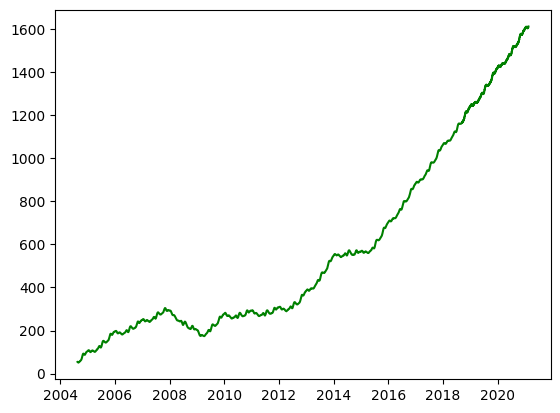

In [18]:
import matplotlib.pyplot as plt

fig = final_model.plot(forecast,)
plt.plot(train_df['ds'], train_df['y'], label="Training Data", color='blue')
plt.plot(test_df['ds'], test_df['y'], label="Actual Test Data", color='black')
plt.legend()
plt.show()
plt.plot(forecast['ds'], forecast['yhat'], label="Prophet Prediction", color='green')

